In [1]:
from sample_preparing import user_info_verification as av
from matplotlib import pyplot as plt
import numpy as np

In [47]:
females1, males1, female_ages1 = av.read_sample_files('Sample/Intermediate_results/1-all_users.txt','Sample/Intermediate_results/1-all_pairs.txt','Sample/Intermediate_results/1-all_ages.txt')

Histogram of all verified users

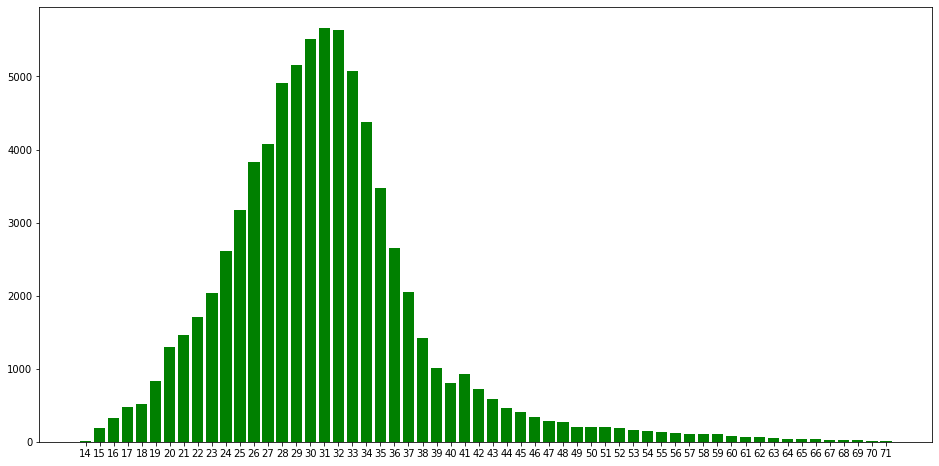

In [48]:
users, pairs, ages = av.group_sort(females1, males1, female_ages1, count = 200)

In [49]:
sch_males, sch_pairs, sch_ages = av.read_csv('Sample/schoolers_with_pairs.csv')
print ('\nLength: {}'.format(len(sch_ages)))

        VK ID ПОЛ ДАТА РОЖДЕНИЯ ССЫЛКА НА ПАРТНЁРА
5   338146480   М          2003          398031321
16  458157574   М          2003          421930610
26  528136454   М          2005          477743268
29  568127843   М          2003          546538435
31  308123825   М          2005          334552771

Length: 16449


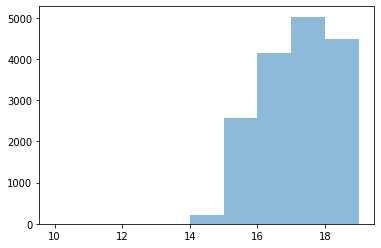

In [50]:
sch_ages = [2020 - int(age) for age in sch_ages]
plt.hist(sch_ages, bins=np.arange(10,20), alpha=0.5)
plt.show()


Merge verified schoolers with all verified people

In [57]:
v_sch_fem, v_sch_mal, v_sch_ages = av.read_sample_files('Sample/Intermediate_results/2-veryfied_schoolers_females.txt',
                                                        'Sample/Intermediate_results/2-schoolers_with_verified_pairs.txt',
                                                        'Sample/Intermediate_results/2-schoolers-females_ages.txt')

In [61]:
males1[:10]

['3320678',
 '18788370',
 '909143',
 '907683',
 '876101',
 '158434583',
 '493023',
 '882308',
 '48425944',
 '34783992']

In [52]:
all_females, all_males, all_ages = av.merge_data(females1, males1, female_ages1, v_sch_fem, v_sch_mal, v_sch_ages)

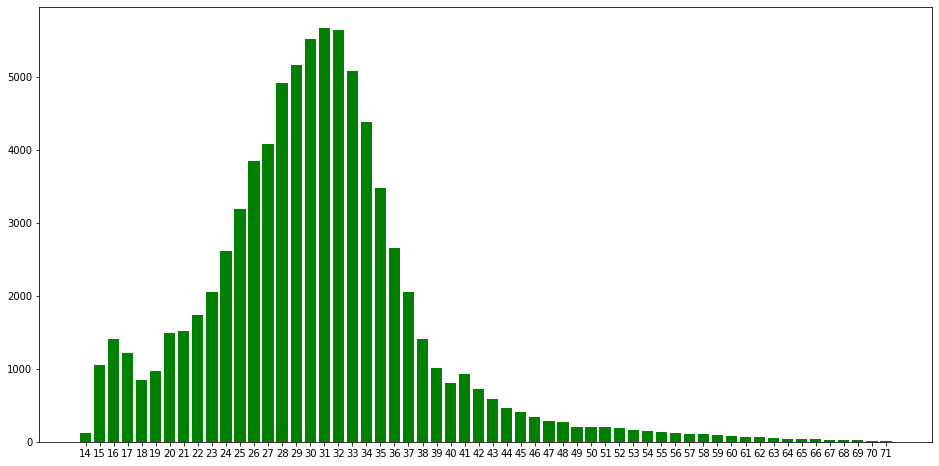

In [53]:
females, males, ages = av.group_sort(all_females, all_males, all_ages, count = 100000)

In [67]:
males[:10]

['531845381',
 '531858265',
 '511857403',
 '501859108',
 '391781820',
 '581905509',
 '351742592',
 '471780040',
 '566348514',
 '456346372']

In [68]:
av.write_to_file(users = males, path ='Sample/tmp/7-verified_users_and_schoolers_males.txt')
av.write_to_file(users = females, path ='Sample/tmp/7-verified_users_and_schoolers_females.txt')
av.write_to_file(users = ages, path ='Sample/tmp/7-verified_users_and_schoolers_ages.txt')

av.write_to_file(users = males, pairs = females, path ='Sample/3-Final_sorted_users_and_pairs.txt')
av.write_to_file(users = ages, path ='Sample/3-Final_sorted_ages.txt')

## Работа с выборкой New_Sample

In [1]:
from sample_preparing import user_info_verification as av

In [2]:
sch_fem = av.read_vk_csv('New_Sample/Schoolers/4-females_info.csv')
print(len(sch_fem))

6738


In [3]:
sch_mal = av.read_vk_csv('New_Sample/Schoolers/4-males_info.csv')
print(len(sch_mal))

5162


In [4]:
schoolers = av.merge_data(sch_fem, sch_mal)
print(len(schoolers))
schoolers.head()

11459


,female_id,female_bdate,male_id,male_bdate
0,567787413,2004,215448854,NaN
1,507795486,2003,238595074,NaN
2,567788124,2005,356537203,NaN
3,327827551,2004,443681469,NaN
4,387832611,2002,288111660,NaN


In [5]:
adults = av.read_vk_csv('New_Sample/Adults/5-filtered_pairs_of_males_info.csv')
print(len(adults))
adults.head()

27654


,female_id,female_bdate,male_id
0,1912,1989,907683
1,7216,1987,34783992
2,11865,1986,115116
3,13966,1988,498703
4,14024,1988,1346014


In [6]:
all_people = av.merge_data(schoolers, adults)
print(len(all_people))
all_people.head()

39057


,female_id,female_bdate,male_id,male_bdate
0,567787413,2004,215448854,NaN
1,507795486,2003,238595074,NaN
2,567788124,2005,356537203,NaN
3,327827551,2004,443681469,NaN
4,387832611,2002,288111660,NaN


In [7]:
av.write_to_file(all_people, 'New_Sample/all_people.csv')

Merge verified users files

In [23]:
import pandas as pd
from sample_preparing import user_info_verification as av

In [26]:
v_users1 = pd.read_csv('Sample/tmp/1-ver_sub_users.csv', index_col=0)
v_users2 = pd.read_csv('Sample/tmp/2-ver_sub_users.csv', index_col=0)
v_users3 = pd.read_csv('Sample/tmp/3-ver_sub_users.csv', index_col=0)
v_users4 = pd.read_csv('Sample/tmp/4-ver_sub_users.csv', index_col=0)

In [27]:
v_users12= av.merge_data(v_users1, v_users2)
v_users123= av.merge_data(v_users12, v_users3)
all_verified_sub_users= av.merge_data(v_users123, v_users4).reset_index(drop=True)

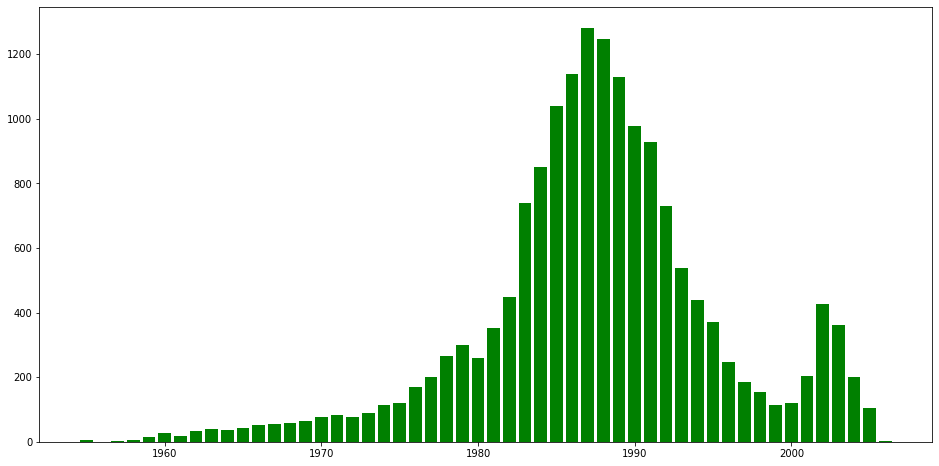

In [29]:
final_sorted_sub_sample = av.group_sort(all_verified_sub_users)

In [30]:

av.write_to_file(final_sorted_sub_sample,'New_Sample/final_sorted_sub_sample.csv')

In [11]:
av.contains_duplicates(final_sorted_sample)

False

## Перепроверка final sorted sample

In [2]:
import pandas as pd
from sample_preparing import user_info_verification as av

In [5]:
final_sorted_sample = pd.read_csv('New_Sample/final_sorted_sample.csv', index_col=0)

In [8]:
already_proccessed = final_sorted_sample[:3238]
already_proccessed.tail()                       

,male_id,male_bdate,female_id,female_bdate
3233,99635158,1990,507102476,1993
3234,190268209,1989,511980899,1994
3235,23086881,1988,491229304,1991
3236,478205863,1987,479740140,1983
3237,20240162,1986,472099439,1989


In [18]:
all_people = pd.read_csv('New_Sample/all_people.csv', index_col=0)
substracted_df=pd.concat([all_people, already_proccessed], sort =False)
substracted_df.drop_duplicates(subset='male_id', keep=False)
substracted_df=substracted_df.drop_duplicates(subset='female_id', keep=False).reset_index(drop=True)

In [19]:
print(len(all_people))
print(len(already_proccessed))
print(len(substracted_df))

39057
3238
35819


In [22]:
av.write_to_file(substracted_df,'New_Sample/substracted_people.csv')

Проверим final_sorted_sample на наличие дубликатов:

In [5]:
final_sorted_sample = pd.read_csv('New_Sample/final_sorted_sample.csv',index_col=0)

In [6]:
f_sort_s = final_sorted_sample.drop_duplicates(subset='male_id').drop_duplicates(subset='female_id')
print(len(f_sort_s))
print(len(final_sorted_sample))

19763
19763


Дубликаты отсутствуют

## Создание словарей имен

In [69]:
import pandas as pd
from sample_preparing import user_info_verification as av

In [82]:
dfru = pd.read_csv('Names_List/FakeNameGenerator_ru.csv')
dfen = pd.read_csv('Names_List/FakeNameGenerator_en.csv')
ru_names2 = pd.read_csv('Names_List/russian_names.csv', delimiter=';', index_col=0)
# ru_fam = pd.read_csv('Names_List/russian_surnames.csv', delimiter=';', index_col=0)

ru_male_names1 = [s.replace('ё','е').replace(chr(769),'').lower() for s in dfru[dfru['Gender'] == 'male']['GivenName']]
ru_male_names2 = [s.replace('ё','е').replace(chr(769),'').lower() for s in ru_names[ru_names2['Sex'] == 'М']['Name']]
ru_male_surnames_endings = set(s.replace(chr(769),'')[-2:].replace('ё','е').lower() for s in dfru[dfru['Gender'] == 'male']['Surname'])

ru_female_names1 = [s.replace('ё','е').replace(chr(769),'').lower() for s in dfru[dfru['Gender'] == 'female']['GivenName']]
ru_female_names2 = [s.replace('ё','е').replace(chr(769),'').lower() for s in ru_names[ru_names2['Sex'] == 'Ж']['Name']]
ru_female_surnames_endings = set(s.replace(chr(769),'')[-2:].replace('ё','е').lower() for s in dfru[dfru['Gender'] == 'female']['Surname'])

en_male_names = set(s.replace('ё','е').replace(chr(769),'').lower() for s in dfen[dfen['Gender'] == 'male']['GivenName'])
en_male_surnames_endings = set(s[-2:].replace(chr(769),'').lower() for s in dfen[dfen['Gender'] == 'male']['Surname'])

en_female_names = set(s.replace(chr(769),'').lower() for s in dfen[dfen['Gender'] == 'female']['GivenName'])
en_female_surnames_endings = set(s[-2:].replace(chr(769),'').lower() for s in dfen[dfen['Gender'] == 'female']['Surname'])



In [119]:
with open('Names_List/russian_names2.csv', encoding='Windows-1251') as file:
    names = av._trim_list(file.read().split('\n'))

ru_male_names3=[]
ru_female_names3=[]
for i, d_name in enumerate(names):
    sex_id = d_name.find(';')-1
    sex = d_name[sex_id]
    name_start = sex_id+4
    d_name = d_name[name_start:]
    name_end = d_name.find("\"")
    name = d_name[:name_end]
    
    if sex == '1':
        ru_female_names3.append(name.lower())
    elif sex == '2':
        ru_male_names3.append(name.lower())
    else:
        print('Unexpected')
        break

In [120]:
print(len(ru_male_names3))
print(len(ru_female_names3))

2417
2362


In [121]:
ru_male_names = set(ru_male_names1 + ru_male_names2 + ru_male_names3)
ru_female_names = set(ru_female_names1 + ru_female_names2 + ru_female_names3)

In [133]:
print(len(ru_male_names))
print(len(ru_female_names))

'саша' in ru_male_names

28610
24625


True

In [128]:

names_dict={}
for i, name in enumerate(ru_male_names):
    names_dict[i] = {'names':name.lower(), 'sex':'male'}
y=i

for i, name in enumerate(ru_female_names):
    k = y+i
    names_dict[k] = {'names':name.lower(), 'sex':'female'}

names_df = pd.DataFrame.from_dict(names_dict, orient='index')

In [129]:
names_df.head()

,names,sex
0,наимгран,male
1,гюльмамед,male
2,маттур,male
3,сатим,male
4,винстон,male


In [130]:
names_df.tail()

,names,sex
53229,гервасия,female
53230,джоана,female
53231,катерына,female
53232,ксанта,female
53233,плотонида,female


In [131]:
names_df.to_csv('Names_List/final_merged_ru_names_list.csv')